In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

%config InlineBackend.figure_format = 'svg'

# Increase the default plot size and set the color scheme
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["image.cmap"] = "viridis"
import pandas as pd

In [2]:
df = pd.read_csv("../data/Video_Games_Sales_as_at_22_Dec_2016.csv").dropna() # удалив пропуски
df.shape

(6825, 16)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   object 
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


In [4]:
df["User_Count"] = df["User_Count"].astype("float64")
#f["User_Score"] = df["User_Score"].astype("int64")
df["Year_of_Release"] = df["Year_of_Release"].astype("int64")
df["Critic_Count"] = df["Critic_Count"].astype("int64")

In [5]:
useful_cols = [
    "Name",
    "Platform",
    "Year_of_Release",
    "Genre",
    "Global_Sales",
    "Critic_Score",
    "Critic_Count",
    "User_Score",
    "User_Count",
    "Rating",
]
df[useful_cols].head()

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,82.53,76.0,51,8,322.0,E
2,Mario Kart Wii,Wii,2008,Racing,35.52,82.0,73,8.3,709.0,E
3,Wii Sports Resort,Wii,2009,Sports,32.77,80.0,73,8,192.0,E
6,New Super Mario Bros.,DS,2006,Platform,29.80,89.0,65,8.5,431.0,E
7,Wii Play,Wii,2006,Misc,28.92,58.0,41,6.6,129.0,E


## DataFrame.plot()

Самый простой способ визуализировать данные из pd, это его собственный метод `.plot()`

Получили график продаж, игр по регионам за $\forall$ год

p.s. реализация метода `.plot()` в `pandas` основана на `matplotlib`

параметр `kind` в `plot(kind="bar", rot=45)` позволяет изменить тип графика [документация](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html)

<Axes: xlabel='Year_of_Release'>

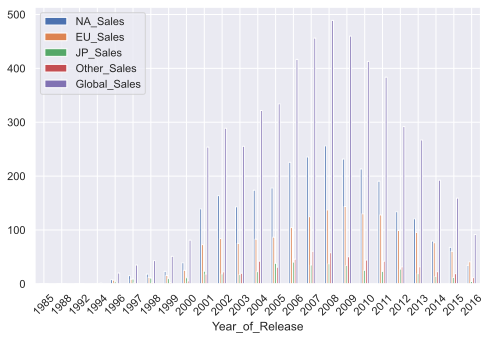

In [6]:
df[[x for x in df.columns if "Sales" in x] + ["Year_of_Release"]].groupby("Year_of_Release").sum().plot(kind="bar", rot=45)